Mostly from https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/fasthill/My-gist/main/data/titanic/test.csv')

In [3]:
combine = [train_df, test_df]

In [4]:
columns = train_df.columns.values

In [5]:
print(columns)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Data

train.csv (data for a subset of the passengers including outcomes (survived or perished)) <br>
test.csv (data for a subset of passengers without outcomes)

##### Data description:
1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Analyze by describing data
1. Which features are <span style='color:red'>categorical</span>? <br> ⦁ Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
<br>
<br>
2. Which features are <span style='color:red'>numerical</span>? <br> ⦁ Continous: Age, Fare. Discrete: SibSp, Parch.

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Which features are <span style='color:red'>mixed data </span>types?  Numerical, alphanumeric data within same feature. <br>
⦁ Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.
<br>
<br>
2. Which features may contain <span style='color:red'>errors or typos</span>?
This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. <br> 
⦁  Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.
<br>
<br>
3. Which features contain <span style='color:red'>blank, null or empty</span> values? These will require correcting. <br> ⦁ Cabin > Age > Embarked features contain a number of null values in that order for the training dataset. <br> 
⦁ Cabin > Age are incomplete in case of test dataset.
<br>
<br>
4. What are the <span style='color:red'>data types</span> for various features? Helping us during converting goal. <br> 
⦁ Seven features are integer or floats. Six in case of test dataset. <br> 
⦁ Five features are strings (object).

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [9]:
test_df.info() # train_df의 1.survieved 가 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df['Parch'].describe(percentiles=[0.75, 0.8])

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
50%        0.000000
75%        0.000000
80%        1.000000
max        6.000000
Name: Parch, dtype: float64

In [12]:
train_df[['Age', 'Fare']].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
10%,14.000000,7.550000
20%,19.000000,7.854200
30%,22.000000,8.050000
40%,25.000000,10.500000
50%,28.000000,14.454200
60%,31.800000,21.679200


In [13]:
train_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,1601,G6,S
freq,1,577,7,4,644


In [14]:
train_df[train_df['Ticket']=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [15]:
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

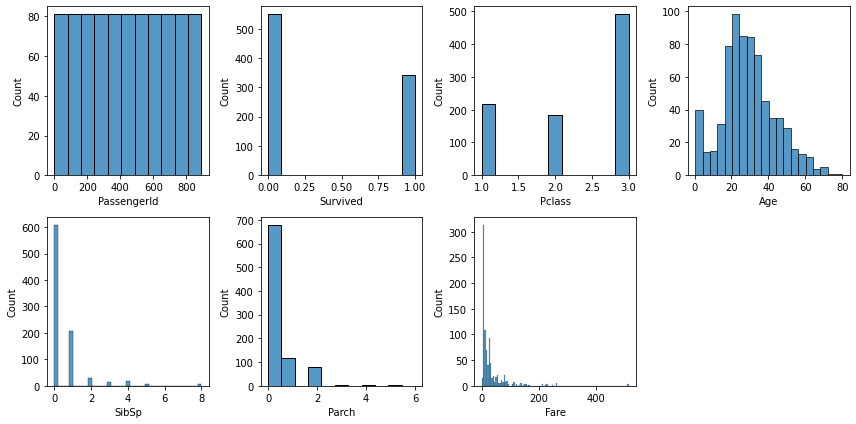

In [16]:
def plt_hist(df):
    num_h = 4
    length = len(df.columns)
    num_v = int(length / 4 + 0.5)
    plt.figure(figsize=(3*num_h,3*num_v))
    for i in range(1, length+1):
        plt.subplot(num_v,num_h,i)
        sns.histplot(df.iloc[:,i-1])
    plt.tight_layout()
    plt.show()

# columns = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch' ,'Fare']
columns = train_df.select_dtypes('number').columns
plt_hist(train_df[columns])

In [17]:
train_df.select_dtypes('number').columns  # select columns which have numerical data only

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
train_df.select_dtypes('object').columns # select columns which have non-numerical data

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Yasbeck, Mrs. Antoni (Selini Alexander)",male,1601,G6,S
freq,1,577,7,4,644


#### Assumtions based on data analysis
1. Correcting.

* <span style='color:red'>Ticket feature</span> may be dropped from our analysis as it contains <span style='color:red'>high ratio of duplicates (22%)</span> and there may not be a correlation between Ticket and survival.<br>
* <span style='color:red'>Cabin feature</span> may be dropped as it is <span style='color:red'>highly incomplete</span> or contains <span style='color:red'>many null values</span> both in training and test dataset.<br>
* <span style='color:red'>PassengerId</span> may be dropped from training dataset as it does not contribute to survival.<br>
* <span style='color:red'>Name feature</span> is relatively non-standard, may not contribute directly to survival, so maybe dropped.


2. Creating.

* We may want to <span style='color:red'>create a new feature called Family</span> based on Parch and SibSp <span style='color:red'>to get total count of family members</span> on board.
* We may want to engineer the <span style='color:red'>Name feature</span> to extract <span style='color:red'> Title as a new feature</span>.
* We may want to create <span style='color:red'>new feature for Age bands</span>. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a <span style='color:red'>Fare range feature</span> if it helps our analysis.

3. Classifying.

* We may also add to <span style='color:blue'>our assumptions</span> based on the problem description noted earlier.

* <span style='color:red'>Women (Sex=female)</span> were more likely to have survived.
* <span style='color:red'>Children (Age<?)</span> were more likely to have survived.
* <span style='color:red'>The upper-class passengers (Pclass=1)</span> were more likely to have survived.

#### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. 

We can only do so at this stage for features which do not have any empty values. 

It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* SibSp and Parch These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [25]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [46]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Pclass                                                      
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0

In [51]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 